In [50]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [138]:
#import the data
data=pd.read_excel('Data_Train.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [52]:
data_test=pd.read_excel('Test_set.xlsx')
data_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [53]:
df=data.append(data_test)

C:\Users\user\AppData\Local\Temp\ipykernel_10020\3207945403.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=data.append(data_test)


In [54]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [55]:
df.Route.mode()[0]

'DEL → BOM → COK'

In [56]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [57]:
df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Airline', ylabel='count'>

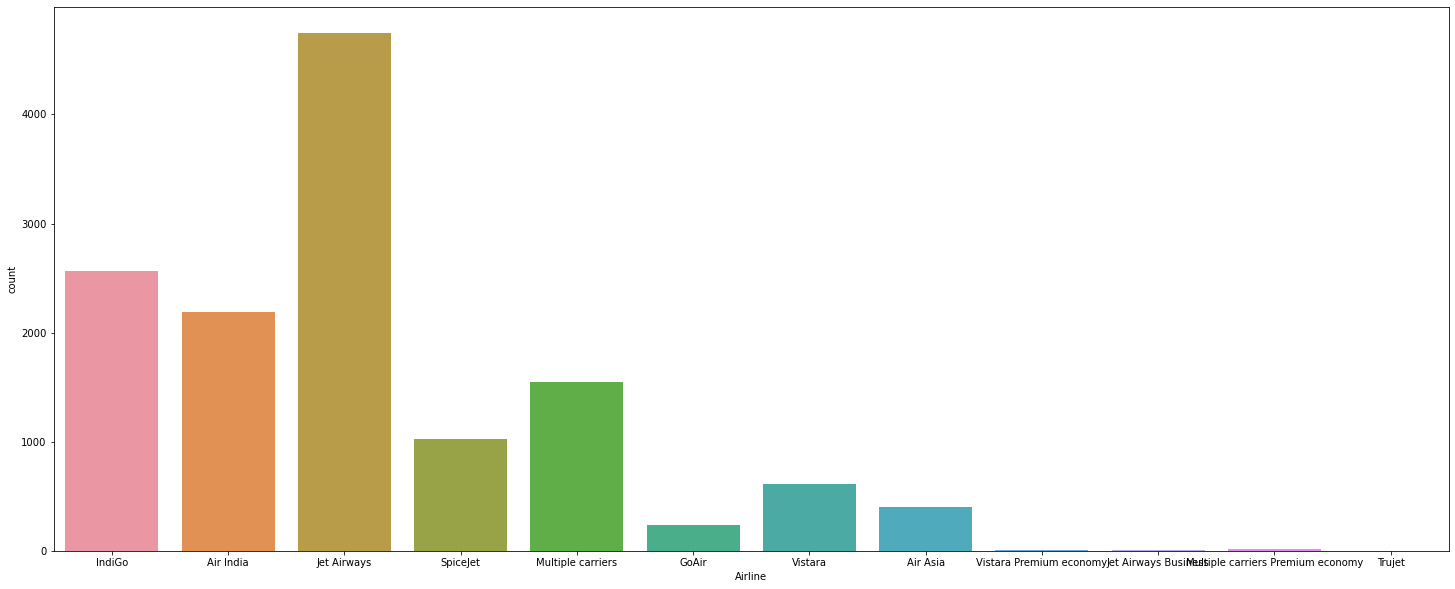

In [58]:
plt.figure(figsize=(25,10))
sns.countplot(df['Airline'])

In [59]:
#feature

In [60]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [61]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,06,2019
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,03,2019
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,03,2019
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,03,2019


In [62]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [64]:
df.drop('Date_of_Journey',inplace=True,axis=1)

In [65]:
df


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,6,2019
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2019
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,3,2019
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019


In [66]:

df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

In [67]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25,23h 55m,1 stop,No info,NaN,6,6,2019
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2019
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25,6h 35m,1 stop,No info,NaN,6,3,2019
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019


In [68]:
df.Dep_Time

0       22:20
1       05:50
2       09:25
3       18:05
4       16:50
        ...  
2666    20:30
2667    14:20
2668    21:50
2669    04:00
2670    04:55
Name: Dep_Time, Length: 13354, dtype: object

In [69]:
df['A_hour']=df['Arrival_Time'].str.split(':').str[0]
df['A_min']=df['Arrival_Time'].str.split(':').str[1]

In [70]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,A_hour,A_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25,23h 55m,1 stop,No info,NaN,6,6,2019,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2019,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25,6h 35m,1 stop,No info,NaN,6,3,2019,04,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019,19,15


In [71]:
df=df.drop(['Arrival_Time'],axis=1)

In [72]:
df['D_hour']=df['Dep_Time'].str.split(':').str[0]
df['D_min']=df['Dep_Time'].str.split(':').str[1]

In [73]:
df.drop(['Dep_Time'],axis=1,inplace=True)


In [74]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,A_hour,A_min,D_hour,D_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,04,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,NaN,6,6,2019,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,NaN,27,3,2019,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,NaN,6,3,2019,04,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,NaN,6,3,2019,19,15,04,00


In [75]:
df['A_hour']=df['A_hour'].astype(int)
df['A_min']=df['A_min'].astype(int)
df['D_hour']=df['D_hour'].astype(int)
df['D_min']=df['D_min'].astype(int)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  A_hour           13354 non-null  int32  
 12  A_min            13354 non-null  int32  
 13  D_hour           13354 non-null  int32  
 14  D_min            13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.3+ MB


In [77]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [78]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [79]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,A_hour,A_min,D_hour,D_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1.0,No info,NaN,6,6,2019,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1.0,No info,NaN,6,3,2019,4,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1.0,No info,NaN,6,3,2019,19,15,4,0


In [80]:
df.drop('Route',axis=1,inplace=True)

In [81]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,A_hour,A_min,D_hour,D_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1.0,No info,NaN,6,6,2019,20,25,20,30
2667,IndiGo,Kolkata,Banglore,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20
2668,Jet Airways,Delhi,Cochin,6h 35m,1.0,No info,NaN,6,3,2019,4,25,21,50
2669,Air India,Delhi,Cochin,15h 15m,1.0,No info,NaN,6,3,2019,19,15,4,0


In [82]:
df['Duration_Hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df[df['Duration_Hour']=='5m']



,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,A_hour,A_min,D_hour,D_min,Duration_Hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [83]:
df.drop(6474,axis=0,inplace=True)
df.drop(2660,axis=0,inplace=True)

In [84]:
df['Duration_Hour']=df['Duration_Hour'].astype(int)

In [85]:
df['Duration_Hour']=df['Duration_Hour']*60

In [86]:
df['Duration_min']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]
df['Duration_min']=df['Duration_min'].fillna('0')
df['Duration_min'].isnull().sum()


0

In [87]:
df['Duration_min']=df['Duration_min'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Duration         13351 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Date             13351 non-null  int32  
 8   Month            13351 non-null  int32  
 9   Year             13351 non-null  int32  
 10  A_hour           13351 non-null  int32  
 11  A_min            13351 non-null  int32  
 12  D_hour           13351 non-null  int32  
 13  D_min            13351 non-null  int32  
 14  Duration_Hour    13351 non-null  int32  
 15  Duration_min     13351 non-null  int32  
dtypes: float64(2), int32(9), object(5)
memory usage: 1.3+ MB


In [88]:
df['Duration_min']=df['Duration_Hour']+df['Duration_min']

In [89]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,A_hour,A_min,D_hour,D_min,Duration_Hour,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,120,170
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,420,445
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,1140,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,300,325
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,240,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1.0,No info,NaN,6,6,2019,20,25,20,30,1380,1435
2667,IndiGo,Kolkata,Banglore,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20,120,155
2668,Jet Airways,Delhi,Cochin,6h 35m,1.0,No info,NaN,6,3,2019,4,25,21,50,360,395
2669,Air India,Delhi,Cochin,15h 15m,1.0,No info,NaN,6,3,2019,19,15,4,0,900,915


In [90]:
df.drop('Duration',axis=1,inplace=True)

In [91]:
df.drop('Duration_Hour',axis=1,inplace=True)

In [92]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,A_hour,A_min,D_hour,D_min,Duration_min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,21,35,16,50,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1.0,No info,NaN,6,6,2019,20,25,20,30,1435
2667,IndiGo,Kolkata,Banglore,0.0,No info,NaN,27,3,2019,16,55,14,20,155
2668,Jet Airways,Delhi,Cochin,1.0,No info,NaN,6,3,2019,4,25,21,50,395
2669,Air India,Delhi,Cochin,1.0,No info,NaN,6,3,2019,19,15,4,0,915


In [109]:
 df=df.drop('Additional_Info',axis=1)

In [110]:
Air=pd.get_dummies(df.Airline,drop_first=True)


In [111]:
Air

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2666,1,0,0,0,0,0,0,0,0,0,0
2667,0,0,1,0,0,0,0,0,0,0,0
2668,0,0,0,1,0,0,0,0,0,0,0
2669,1,0,0,0,0,0,0,0,0,0,0


In [112]:
Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [113]:
Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [114]:
final_df = pd.concat([df, Air, Source, Destination], axis = 1)

In [115]:
final_df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,A_hour,A_min,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897.0,24,3,2019,1,10,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2.0,7662.0,1,5,2019,13,15,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2.0,13882.0,9,6,2019,4,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1.0,6218.0,12,5,2019,23,30,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1.0,13302.0,1,3,2019,21,35,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1.0,NaN,6,6,2019,20,25,...,0,0,0,1,0,0,0,0,0,0
2667,IndiGo,Kolkata,Banglore,0.0,NaN,27,3,2019,16,55,...,0,0,0,1,0,0,0,0,0,0
2668,Jet Airways,Delhi,Cochin,1.0,NaN,6,3,2019,4,25,...,0,0,1,0,0,1,0,0,0,0
2669,Air India,Delhi,Cochin,1.0,NaN,6,3,2019,19,15,...,0,0,1,0,0,1,0,0,0,0


In [120]:
final_df=final_df.drop(['Airline','Source','Destination'],axis=1)

In [121]:
data_test=final_df[final_df['Price'].isnull()]
data_train=final_df[~final_df['Price'].isnull()]

In [122]:
data_train

,Total_Stops,Price,Date,Month,Year,A_hour,A_min,D_hour,D_min,Duration_min,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897.0,24,3,2019,1,10,22,20,170,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662.0,1,5,2019,13,15,5,50,445,...,0,0,0,1,0,0,0,0,0,0
2,2.0,13882.0,9,6,2019,4,25,9,25,1140,...,0,0,1,0,0,1,0,0,0,0
3,1.0,6218.0,12,5,2019,23,30,18,5,325,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13302.0,1,3,2019,21,35,16,50,285,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,4107.0,9,4,2019,22,25,19,55,150,...,0,0,0,1,0,0,0,0,0,0
10679,0.0,4145.0,27,4,2019,23,20,20,45,155,...,0,0,0,1,0,0,0,0,0,0
10680,0.0,7229.0,27,4,2019,11,20,8,20,180,...,0,0,0,0,0,0,1,0,0,0
10681,0.0,12648.0,1,3,2019,14,10,11,30,160,...,0,0,0,0,0,0,0,0,0,1


In [130]:
data_train.dropna(inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_10020\1828797412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.dropna(inplace = True)


In [131]:
y=data_train['Price']
X=data_train.drop('Price',axis=1)

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [133]:
X_train.Total_Stops

1034    1.0
6931    1.0
8512    0.0
4970    1.0
906     0.0
       ... 
5735    1.0
5192    1.0
5391    2.0
860     0.0
7272    1.0
Name: Total_Stops, Length: 8544, dtype: float64

In [134]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [135]:
y_pred = reg_rf.predict(X_test)

In [136]:
reg_rf.score(X_train, y_train)

0.9495125591854875

In [137]:
reg_rf.score(X_test, y_test)

0.8355044184864172

## Conclusion
**1.Accuracy in training Data: 94%**<br>
**2.Accuracy in test :83%**<br>
We can say that our model is not Overfitted